Для выборок полученных в "Игре в имитацию" проверить на уровне значимости 0,05 гипотезы о соответствии теоретическим распределениям из задания 11

2. Непрерывная случайная величина ξ распределена по экспоненциальному закону с параметром λ соответствующим данным варианта. Используя генератор псевдослучайных чисел, получить 10000 чисел, имитирующих поведение ξ. Построить выборочное распределение, интервальный ряд и гистограмму. Найти несмещенные оценки для математического ожидании и дисперсии. Здесь λ определяется номер по списку разделить на 4.

λ = 2.25

In [244]:
import numpy as np
import math as m

Генерируем случайные числа

In [245]:
n = 10_000
data = np.random.rand(n)
print(data)

[0.67444695 0.23041324 0.46906939 ... 0.40878281 0.67407371 0.7071235 ]


In [246]:
import math as m
data_exp = [-(1/2.25) * np.log(data_i) for data_i in data]
min_data = min(data_exp)
max_data = max(data_exp)
d = max_data - min_data
h = d/6
print(min_data, max_data, d, h)
#print(data_exp)

1.5251160030846925e-05 3.791886165880282 3.791870914720251 0.6319784857867085


In [247]:
#границы интервалов
a =[]
for i in range(1,6):
    a.append(h*i)
#a = [h*i for i in range(5)]
a.append(6*h + 0.001)
print(a)

[0.6319784857867085, 1.263956971573417, 1.8959354573601255, 2.527913943146834, 3.159892428933542, 3.792870914720251]


In [248]:
import math as m
p = []
p.append(1 - m.exp(-2.25 * a[0]))
for i in range(len(a) - 2):
    p.append(m.exp(-2.25*a[i]) - m.exp(-2.25*a[i+1]))
p.append(1-sum(p))
print(p)
m = [n*p_i for p_i in p]
print(sum(m))

[0.7587572504805594, 0.18304468532374105, 0.04415820317242007, 0.010652846347152705, 0.0025699219429952463, 0.0008170927331315747]
10000.0


In [250]:
n_i = [0 for _ in range(len(a))]
for i in range(n):
    if data_exp[i] < a[0]:
        n_i[0] += 1
    elif data_exp[i] > a[0] and data_exp[i] < a[1]:
        n_i[1]+=1
    elif data_exp[i] > a[1] and data_exp[i] < a[2]:
        n_i[2]+=1
    elif data_exp[i] > a[2] and data_exp[i] < a[3]:
        n_i[3]+=1
    elif data_exp[i] > a[3] and data_exp[i] < a[4]:
        n_i[4]+=1
    else:
        n_i[5]+=1
    #for j in range(1,len(a)):
        #if data_exp[i] < a[j] and data_exp[i] > a[j-1]:
            #n_i[j -1] += 1
print(n_i)
print(sum(n_i))
print(m)
m[3] += m[4]
n_i[3] += n_i[4]

[7642, 1809, 425, 96, 19, 9]
10000
[7587.572504805594, 1830.4468532374106, 441.5820317242007, 132.2276829014795, 25.699219429952464, 8.170927331315747]


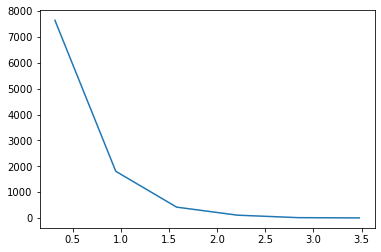

In [251]:
import matplotlib.pyplot as plt
x = [a[0]/2]
for i in range(len(a) - 1):
    x.append((a[i] + a[i+1]) / 2)
y = n_i
plt.plot(x,y)

In [253]:
import pandas as pd
series = pd.Series(data_exp)
#print(series.describe())
print('оценка несмещенной дисперии', series.std()**2)
print('оценка несмещенного математического ожидания', series.mean())

оценка несмещенной дисперии 0.18855991290707447
оценка несмещенного математического ожидания 0.4381136047633515


In [252]:
from scipy import stats
X, p = stats.chisquare(n_i, m)
print(X, p)
if p > 0.5:
    print('Гипотеза верна')
else:
    print('Гипотеза не верна')

14.763025264878292 0.011424368712844208
Гипотеза не верна
